## Table of Contents
* [1. Introduction](#chapter1)
    * [1.1 Description](#section1_1)
    * [1.2 Main aims](#section1_2)
    * [1.3 Data description](#section1_3)
* [2. Preparation](#chapter2)
    * [2.1 Importing libs](#section2_1)
    * [2.2 Data import, research and preparation](#section2_2) 
* [3. Prioritization of hypotheses](#chapter3)
    * [3.1 Applying framework ICE for prioritization](#section3_1)
    * [3.2 Applying framework RICE for prioritization](#section3_2)
    * [3.3 Interpretation of the application of frameworks](#section3_3)
* [4. A/B testing](#chapter4)
    * [4.1 Exploration of data.](#section4_1)
    * [4.2 Exploration of cumulative revenue by groups.](#section4_2)
    * [4.3 Analysis of cumulative average check by groups.](#section4_3)
    * [4.4 Relative change in cumulative average check of Group B compared to Group A.](#section4_4)
    * [4.5 Cumulative average number of orders per users by groups.](#section4_5)
    * [4.6 Relative change of cumulative average number of orders per user of Group B to Group A.](#section4_6)
    * [4.7 Scatter plot of the number of orders per user.](#section4_7)
    * [4.8 Calculating the 95th and 99th percentiles of the number of orders per user.](#section4_8)
    * [4.9 Scatter plot of revenue from orders.](#section4_9)
    * [4.10 95-th and 99-th percentile of order value.](#section4_10)
    * [4.1 Calculation of statistical significance of differences in the average number of orders per visitor between groups based on "raw" data.](#section4_11)
    * [4.12 Calculation of statistical significance of the differences in the average order value between groups based on "raw" data.](#section4_12)
    * [4.13 Calculation of the statistical significance of differences in the average number of orders per visitor between groups based on "clean" data.](#section4_13)
    * [4.14 Calculation of the statistical significance of the differences in the average order value between the groups based on "clean" data.](#section4_14)    
* [5. Results](#chapter5)    

# 1. Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Description <a class="anchor" id="section1_1"></a>

This work involves analyzing the data of a large online store. Together with the marketing department, a list of hypotheses is being analyzed to increase revenue. The result of the work is the prioritization of hypotheses, conducting an A/B test, and interpreting its results.

### 1.2 Main aims: <a class="anchor" id="section1_2"></a>

1. Prioritization of given hypothesis.
2. A/B test results interpretation with provision of recommendations.

### 1.3 Data description <a class="anchor" id="section1_3"></a>

File **hypothesis.csv** conatains list of hypotheses, which should be prioritazed:
- `Hypothesis` - a brief description of the hypothesis;
- `Reach` - user coverage on a 10-point scale;
- `Impact` - impact on users on a 10-point scale;
- `Confidence` - confidence in the hypothesis on a 10-point scale;
- `Efforts` - resources spent on testing the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive testing the hypothesis.

File **orders.csv** contains orders from A/B test:
- `transactionId` - order identifier;
- `visitorId` - identifier of the user who made the order;
- `date` - the date the order was made;
- `revenue` - revenue of the order;
- `group` - the A/B test group to which the order belongs.

File **visitors.csv**contains visitors from A/B test:
- `date` - date;
- `group` - A/B test group;
- `visitors` - number of users on the specified date in the specified A/B test group.

# 2. Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Importing libs <a class="anchor" id="section2_1"></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st

### 2.2 Data import, research and preparation <a class="anchor" id="section2_2"></a>

In [2]:
# Uploading dataset with hypotheses specifics 
data = pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/4.%20AB%20test/datasets/hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# Renaming columns
data.columns = ['hypothesis','reach','impact','confidence','efforts']

# Adding numeration to hypotheses for easier referencing
data['hypothesis_number'] = np.arange(data.shape[0]) + 1
data['hypothesis_number'] = 'hypothesis_' + data['hypothesis_number'].astype(str)
data

,hypothesis,reach,impact,confidence,efforts,hypothesis_number
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,hypothesis_1
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,hypothesis_2
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,hypothesis_3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,hypothesis_4
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,hypothesis_5
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,hypothesis_6
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,hypothesis_7
7,Добавить форму подписки на все основные страни...,10,7,8,5,hypothesis_8
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,hypothesis_9


In [4]:
# Checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hypothesis         9 non-null      object
 1   reach              9 non-null      int64 
 2   impact             9 non-null      int64 
 3   confidence         9 non-null      int64 
 4   efforts            9 non-null      int64 
 5   hypothesis_number  9 non-null      object
dtypes: int64(4), object(2)
memory usage: 560.0+ bytes


# 3. Prioritization of hypotheses <a class="anchor" id="chapter3"></a>

### 3.1 Applying framework ICE for prioritization <a class="anchor" id="section3_1"></a>

In [5]:
# Calculating ICE for given hypotheses
data['ICE'] = round((data['impact'] * data['confidence'] )/data['efforts'],2)

data.sort_values(by='ICE', ascending=False)[['hypothesis','hypothesis_number','ICE']]

,hypothesis,hypothesis_number,ICE
8,"Запустить акцию, дающую скидку на товар в день...",hypothesis_9,16.20
0,"Добавить два новых канала привлечения трафика,...",hypothesis_1,13.33
7,Добавить форму подписки на все основные страни...,hypothesis_8,11.20
6,Показать на главной странице баннеры с актуаль...,hypothesis_7,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,hypothesis_3,7.00
1,"Запустить собственную службу доставки, что сок...",hypothesis_2,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",hypothesis_6,1.33
3,"Изменить структура категорий, что увеличит кон...",hypothesis_4,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",hypothesis_5,1.00


**The most promising hypotheses according to ICE**: №9, №1 и №8

### 3.2 Applying framework RICE for prioritization <a class="anchor" id="section3_2"></a>

In [6]:
# Calculating RICE for given hypotheses
data['RICE'] = round((data['reach'] * data['impact'] * data['confidence'])/data['efforts'],2)

data.sort_values(by='RICE', ascending=False)[['hypothesis','hypothesis_number','RICE']]

,hypothesis,hypothesis_number,RICE
7,Добавить форму подписки на все основные страни...,hypothesis_8,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,hypothesis_3,56.0
0,"Добавить два новых канала привлечения трафика,...",hypothesis_1,40.0
6,Показать на главной странице баннеры с актуаль...,hypothesis_7,40.0
8,"Запустить акцию, дающую скидку на товар в день...",hypothesis_9,16.2
3,"Изменить структура категорий, что увеличит кон...",hypothesis_4,9.0
1,"Запустить собственную службу доставки, что сок...",hypothesis_2,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",hypothesis_6,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",hypothesis_5,3.0


**The most promising hypotheses according to RICE**: №8, №3, №1 и №7

### 3.3 Interpretation of the application of frameworks <a class="anchor" id="section3_3"></a>

For the purpose of prioritizing hypotheses, two frameworks were used: `ICE` and `RICE`. The difference between the frameworks is that `RICE` takes into account an important element called Reach, which reflects the degree of user coverage during hypothesis testing.

- According to the `ICE` framework, the most promising hypothesis is **hypothesis #9**, but due to low user coverage (Reach equals 1), `RICE` reduces its priority. 
- Both frameworks indicate the potential of **hypothesis #8** (mainly due to a coverage score of 10) and **hypothesis #1** (with an impact score of 10). 
- **Hypothesis #7**, due to low testing costs and high confidence in the results according to both frameworks, is evaluated at a relatively high level.

# 4. A/B testing <a class="anchor" id="chapter4"></a>

### 4.1 Exploration of data. <a class="anchor" id="section4_1"></a>

In [7]:
orders = pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/4.%20AB%20test/datasets/orders.csv', sep=',')
visitors = pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/4.%20AB%20test/datasets/visitors.csv', sep=',')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# Checking datatypes and duplicates
print(orders.info(),'\nDuplicated:' + str(orders.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 
Duplicated:0


In [10]:
# Changing column date to type date
orders['date'] = pd.to_datetime(orders['date']).dt.date 

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# Checking datatypes and duplicates
print(visitors.info(),'\nDuplicated:' + str(visitors.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 
Duplicated:0


In [13]:
# Changing column date to type date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date 

In [14]:
# Checking intersection of users between groups A and B
group_duplicated = orders[['visitorId','group']].drop_duplicates().groupby('visitorId').agg({'group':'nunique'}).reset_index()

group_duplicated = group_duplicated[group_duplicated['group'] > 1]

In [15]:
len(group_duplicated['visitorId'].unique())

58

In [16]:
# Removing intersecting users
orders = orders[np.logical_not(orders['visitorId'].isin(group_duplicated['visitorId']))]

### 4.2 Exploration of cumulative revenue by groups. <a class="anchor" id="section4_2"></a>

In [17]:
# Grouping data by date and test group
datesGroups = orders[['date','group']].drop_duplicates()

In [18]:
# Aggregating orders by day for cumulative values calculation
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [19]:
# Aggregating users by day for cumulative values calculation
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Merging cumulative data by users and orders
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [21]:
# Dividing by А and В groups
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

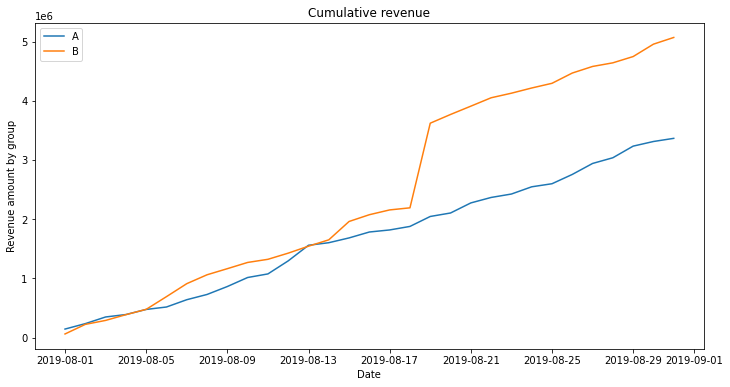

In [22]:
# Plotting cumulative revenue by groups
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue')
plt.xlabel('Date')
plt.ylabel('Revenue amount by group')

plt.legend()
plt.show()

#### Brief conclusions on cumulative revenue

* In the first half of the test, the revenue between the groups was slightly different, but then the revenue of group B became significantly higher than that of group A. The reasons for such dynamics could be:
    - An increase in orders in group B;
    - An increase in the average check of group B;
    - Abnormal checks in group B.

### 4.3 Analysis of cumulative average check by groups. <a class="anchor" id="section4_3"></a>

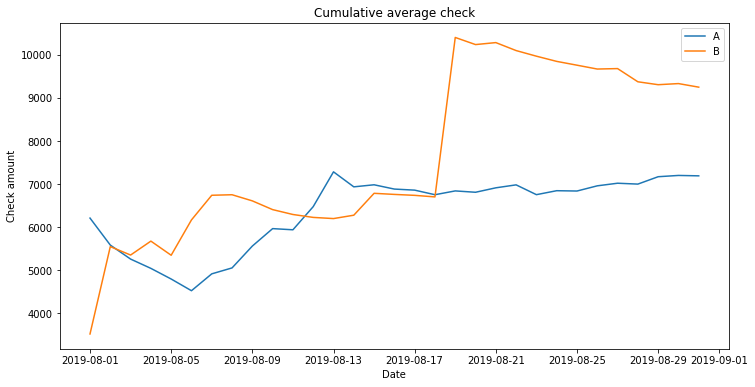

In [23]:
# Plotting cumulative average check by groups
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average check')
plt.xlabel('Date')
plt.ylabel('Check amount')

plt.legend()
plt.show()

#### Brief conclusions on cumulative average check

* Similarly to the graph with cumulative revenue, there is a sharp increase in the middle of the testing period in group B, followed by a gradual decline. At the same time, in group A, the growth is followed by a small decline and then levels off.

### 4.4 Relative change in cumulative average check of Group B compared to Group A. <a class="anchor" id="section4_4"></a>

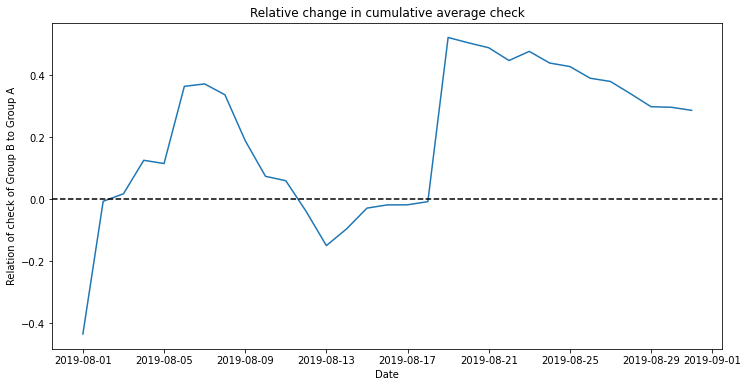

In [24]:
# Merging data
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Creating the relation
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative change in cumulative average check')
plt.xlabel('Date')
plt.ylabel('Relation of check of Group B to Group A')

# Adding x axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

#### Brief conclusions on cumulative average check relation

Judging by the dynamics of the relative change in checks between the groups, one can conclude that there were multiple significant fluctuations towards one of the groups during the testing period, which may indicate the presence of abnormal orders.

### 4.5 Cumulative average number of orders per users by groups. <a class="anchor" id="section4_5"></a>

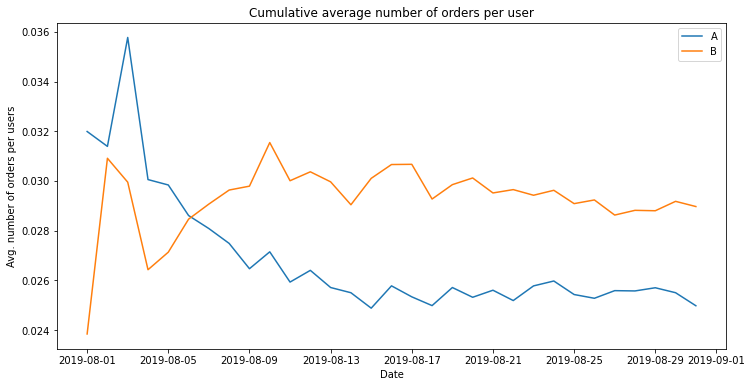

In [25]:
# Plotting cumulative average number of orders per user
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.title('Cumulative average number of orders per user')
plt.xlabel('Date')
plt.ylabel('Avg. number of orders per users')
plt.legend() 
plt.show()

#### Brief conclusions on cumulative average number of orders per user

The dynamics of the number of orders do not correspond to the dynamics of the previous graphs - we observe significant fluctuations between the groups at the very beginning of the testing, with subsequent dominance of group B.

### 4.6 Relative change of cumulative average number of orders per user of Group B to Group A. <a class="anchor" id="section4_6"></a>

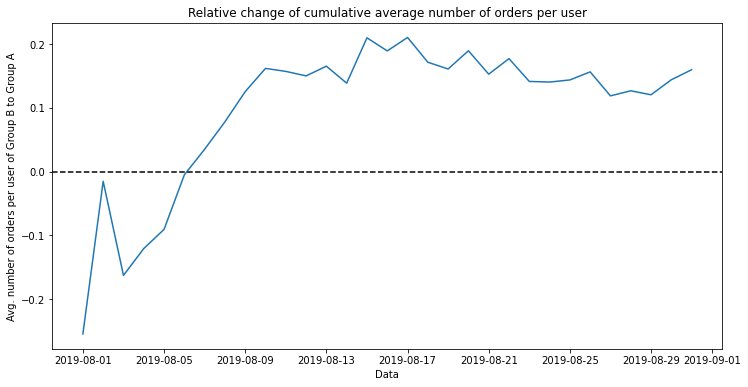

In [26]:
# Plotting cumulative average number of orders per user
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.title('Relative change of cumulative average number of orders per user')
plt.xlabel('Data')
plt.ylabel('Avg. number of orders per user of Group B to Group A')
# Adding x axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

#### Brief conclusions on relative change of cumulative average number of orders per user

* The average number of orders for Group B one week after the start of the test shows a significant difference from the orders of Group A, reaching a maximum value of 20% and staying within 10%-15% for a significant part of the test.

### 4.7 Scatter plot of the number of orders per user <a class="anchor" id="section4_7"></a>

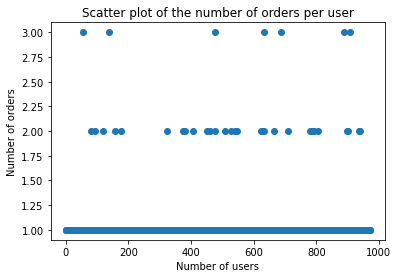

In [27]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.title('Scatter plot of the number of orders per user')
plt.xlabel('Number of users')
plt.ylabel('Number of orders')

plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

#### Brief conclusions on scatter plot of the number of orders per user

*The majority of users made one order, while there are some users with two orders and a small group with a larger number of orders.

### 4.8 Calculating the 95th and 99th percentiles of the number of orders per user. <a class="anchor" id="section4_8"></a>

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

In [29]:
orders_breakpoint = 2

#### In order to define abnormal users, we choose 2 orders as a threshold based on the calculation of the 99th percentile.

### 4.9 Scatter plot of revenue from orders. <a class="anchor" id="section4_9"></a>

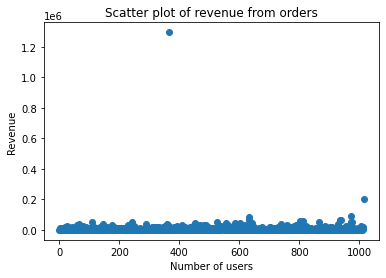

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Scatter plot of revenue from orders')
plt.xlabel('Number of users')
plt.ylabel('Revenue')

plt.show()

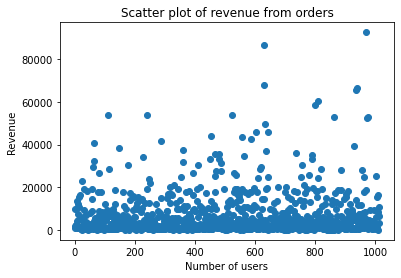

In [31]:
# Sorting two outliners and plotting without them
orders_top2 = orders.sort_values(by='revenue',ascending=False).head(2)['transactionId']

orders_wo_top2 = orders[np.logical_not(orders['transactionId'].isin(orders_top2))]

x_upd_values = pd.Series(range(0, len(orders_wo_top2['revenue'])))

plt.scatter(x_upd_values, orders_wo_top2['revenue']) 

plt.title('Scatter plot of revenue from orders')
plt.xlabel('Number of users')
plt.ylabel('Revenue')

plt.show()

#### Brief conclusions on scatter plot of revenue from orders

* There are two clear outliers among the orders exceeding 200,000;
* In the remaining group, the majority of orders fall within the range of up to 30,000.

### 4.10 95-th and 99-th percentile of order value  <a class="anchor" id="section4_10"></a>

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

In [33]:
revenue_breakpoint = 28000

#### Let's limit the order cost to slightly above the 95th percentile, which is 28000.

### 4.11 Calculation of statistical significance of differences in the average number of orders per visitor between groups based on "raw" data. <a class="anchor" id="section4_11"></a>

#### Formulating hypothesis:
* We will assume the absence of a difference in the average number of orders between the groups as the null hypothesis;
* The alternative hypothesis is the presence of a significant difference.

For best comparison  of the data samples, we will use the **Mann-Whitney** criterion, which is a non-parametric test. The examined data is subject to outliers, and accordingly, parametric tests will show a distorted result. Using a rank-based approach, the Mann-Whitney criterion will avoid this problem and compare the samples not by their values, but by shifts within an ordered sample.

In [34]:
# Combining into sampleA and sampleB order data by groups

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [35]:
visitors['visitorsPerDateA'] = visitors[visitors['group'] == 'A']['visitors']
visitors['visitorsPerDateB'] = visitors[visitors['group'] == 'B']['visitors']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]  

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
print("p-value is:", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative difference is:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value is: 0.006
Relative difference is: 0.160


#### Brief conclusions

* A p-value below the level of 0.05 indicates that there are reasons to reject the null hypothesis - there are statistically significant differences in the average number of orders between the two groups.
* The difference in the mean number of orders between the groups is 16%.

### 4.12 Calculation of statistical significance of the differences in the average order value between groups based on "raw" data. <a class="anchor" id="section4_12"></a>

#### Formulating hypothesis:
* We will assume the absence of a difference in the average check between the groups as the null hypothesis;
* The alternative hypothesis is the presence of a significant difference.

In [37]:
print("p-value равен", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная разница составляет", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value равен 0.415
Относительная разница составляет 0.287


### 4.13 Calculation of the statistical significance of differences in the average number of orders per visitor between groups based on "clean" data. <a class="anchor" id="section4_13"></a>

In [38]:
# Taking data by previously set order and revenue limits
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_breakpoint]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_breakpoint]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_breakpoint]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [39]:
# Checking the loss of users
print('Number of users for exclusion:', abnormalUsers.shape[0]) 
print('Relative number of users for exclusion:',round(abnormalUsers.shape[0]/len(orders['visitorId'].unique()),2))

Number of users for exclusion: 55
Relative number of users for exclusion: 0.06


#### The result of comparing the average number of orders between groups on "clean" data:

In [40]:
print("p-value is equal to:", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative difference is equal to:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value is equal to: 0.005
Relative difference is equal to: 0.189


#### Brief conclusions:
* "p-value below the level of 0.05 indicates that there are reasons to reject the null hypothesis - there are statistically significant differences in the average number of orders between the two groups. The conclusion on "raw" data is repeated;
* The difference in the average number of orders between the groups is 19%."

### 4.14 Calculation of the statistical significance of the differences in the average order value between the groups based on "clean" data. <a class="anchor" id="section4_14"></a>

#### Результат сравнения среднего чека между группами на "очищенных" данных:

In [41]:
print("p-value is:", 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Relative difference is:", 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value is: 0.381
Relative difference is: -0.022


#### Brief conclusion:
* A p-value above **0.05** indicates the lack of reasons to reject the null hypothesis - there are no statistically significant differences in the average check between the two groups. The conclusion on "raw" data was repeated;
* In the previous calculation on "raw" data, the average check of **group B** was higher than **group A** by **28.7%**, but excluding outliers changed the dynamics, and now the average check of **group A** is **2.2%** higher than that of **group B**.

# 5. Results <a class="anchor" id="chapter5"></a>

**During the test, the following was revealed:**
* Significant differences between groups A and B in the average number of orders. **Group B has a 19% higher rate on "clean" data**;
* No significant differences between groups A and B in the average check. Group A had **a 28.7% lower rate on "raw" data, but higher by 2.2% on "clean" data**.
The above conclusions obtained using **the Mann-Whitney criterion** were obtained both on "raw" and "clean" data.<br>
The need to clean the data was also confirmed by the significant difference in the average check between the groups: there were abnormally high checks in group B that distorted the mean values.<br>

**Proposal based on the analysis above:** record the test results and designate group B as the winner. Despite the minor differences in the check, group B shows a significantly better number of orders.